# Calling Libraries

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
from numpy.random import seed
from numpy.random import randn
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import scipy
from scipy import stats
from scipy.stats import t

# Importing Data

In [2]:
data = pd.read_table("/Users/bhavikamehta/Downloads/Python Project/data.txt")

/Users/bhavikamehta/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Checking Summary

In [3]:
pd.pandas.set_option('display.max_columns',None)
data.describe(include = "all")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969,855969.000000,855969.000000,855969,855969,806526,812908,855969,8.559690e+05,855969,855969,855969,121812,855969,855936,855969,855969,855969.000000,855969.000000,855969,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,847107,855969.000000,602998,855919,855913.000000,213139.000000,855969.0,855969,442.000000,440.000000,442,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,290912,11,6,NaN,3,103,2,120335,14,60991,931,51,NaN,NaN,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,3,102,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Source Verified,Oct-2015,n,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Aug-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-2016,NaN,Feb-2016,Jan-2016,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,Not Verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,600221,NaN,NaN,247998,54958,12965,282090,429106,NaN,318178,48212,855964,231,505392,398089,9466,125172,NaN,NaN,6433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467510,NaN,534094,701687,NaN,NaN,NaN,855527,NaN,NaN,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,NaN,13.192320,436.238072,NaN,NaN,NaN,NaN,NaN,7.507119e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.122165,0.311621,NaN,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,NaN,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,NaN,2225.985295,NaN,NaN,0.014230,44.101450,1.0,NaN,107412.163982,18.318477,NaN,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,NaN,4.368365,243.726876,NaN,NaN,NaN,NaN,NaN,6.426447e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.423629,0.857189,NaN,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,NaN,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,NaN,4864.966593,NaN,NaN,0.133712,22.164907,0.0,NaN,47987.608637,7.221855,NaN,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.4

# Checking how data looks like

In [4]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-2011,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,NaN,NaN,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,

In [5]:
data.shape

(855969, 73)

In [6]:
# Checking data type of each variable
pd.pandas.set_option('display.max_columns',None)
data.dtypes.head(60)

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths           

# Data Encoding

In [7]:
# Removing months element from the observations
data["term"] = data["term"].replace({'months':''}, regex = True)
# Removing and years and spaces from the observations
data["emp_length"] = data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':''}, regex = True)
# Maintaing uniformity in vertification status
data["verification_status"] = data["verification_status"].replace({"Verified": 1,"Source Verified": 1,"Not Verified": 0})

# Changing necessary data types to Date and Time

In [8]:
data["issue_d"] = pd.to_datetime(data["issue_d"])
data["earliest_cr_line"] = pd.to_datetime(data["earliest_cr_line"])
data["last_pymnt_d"] = pd.to_datetime(data["last_pymnt_d"])
data["next_pymnt_d"] = pd.to_datetime(data["next_pymnt_d"])
data["last_credit_pull_d"] = pd.to_datetime(data["last_credit_pull_d"])

# Finding correlation between Numerical Variables

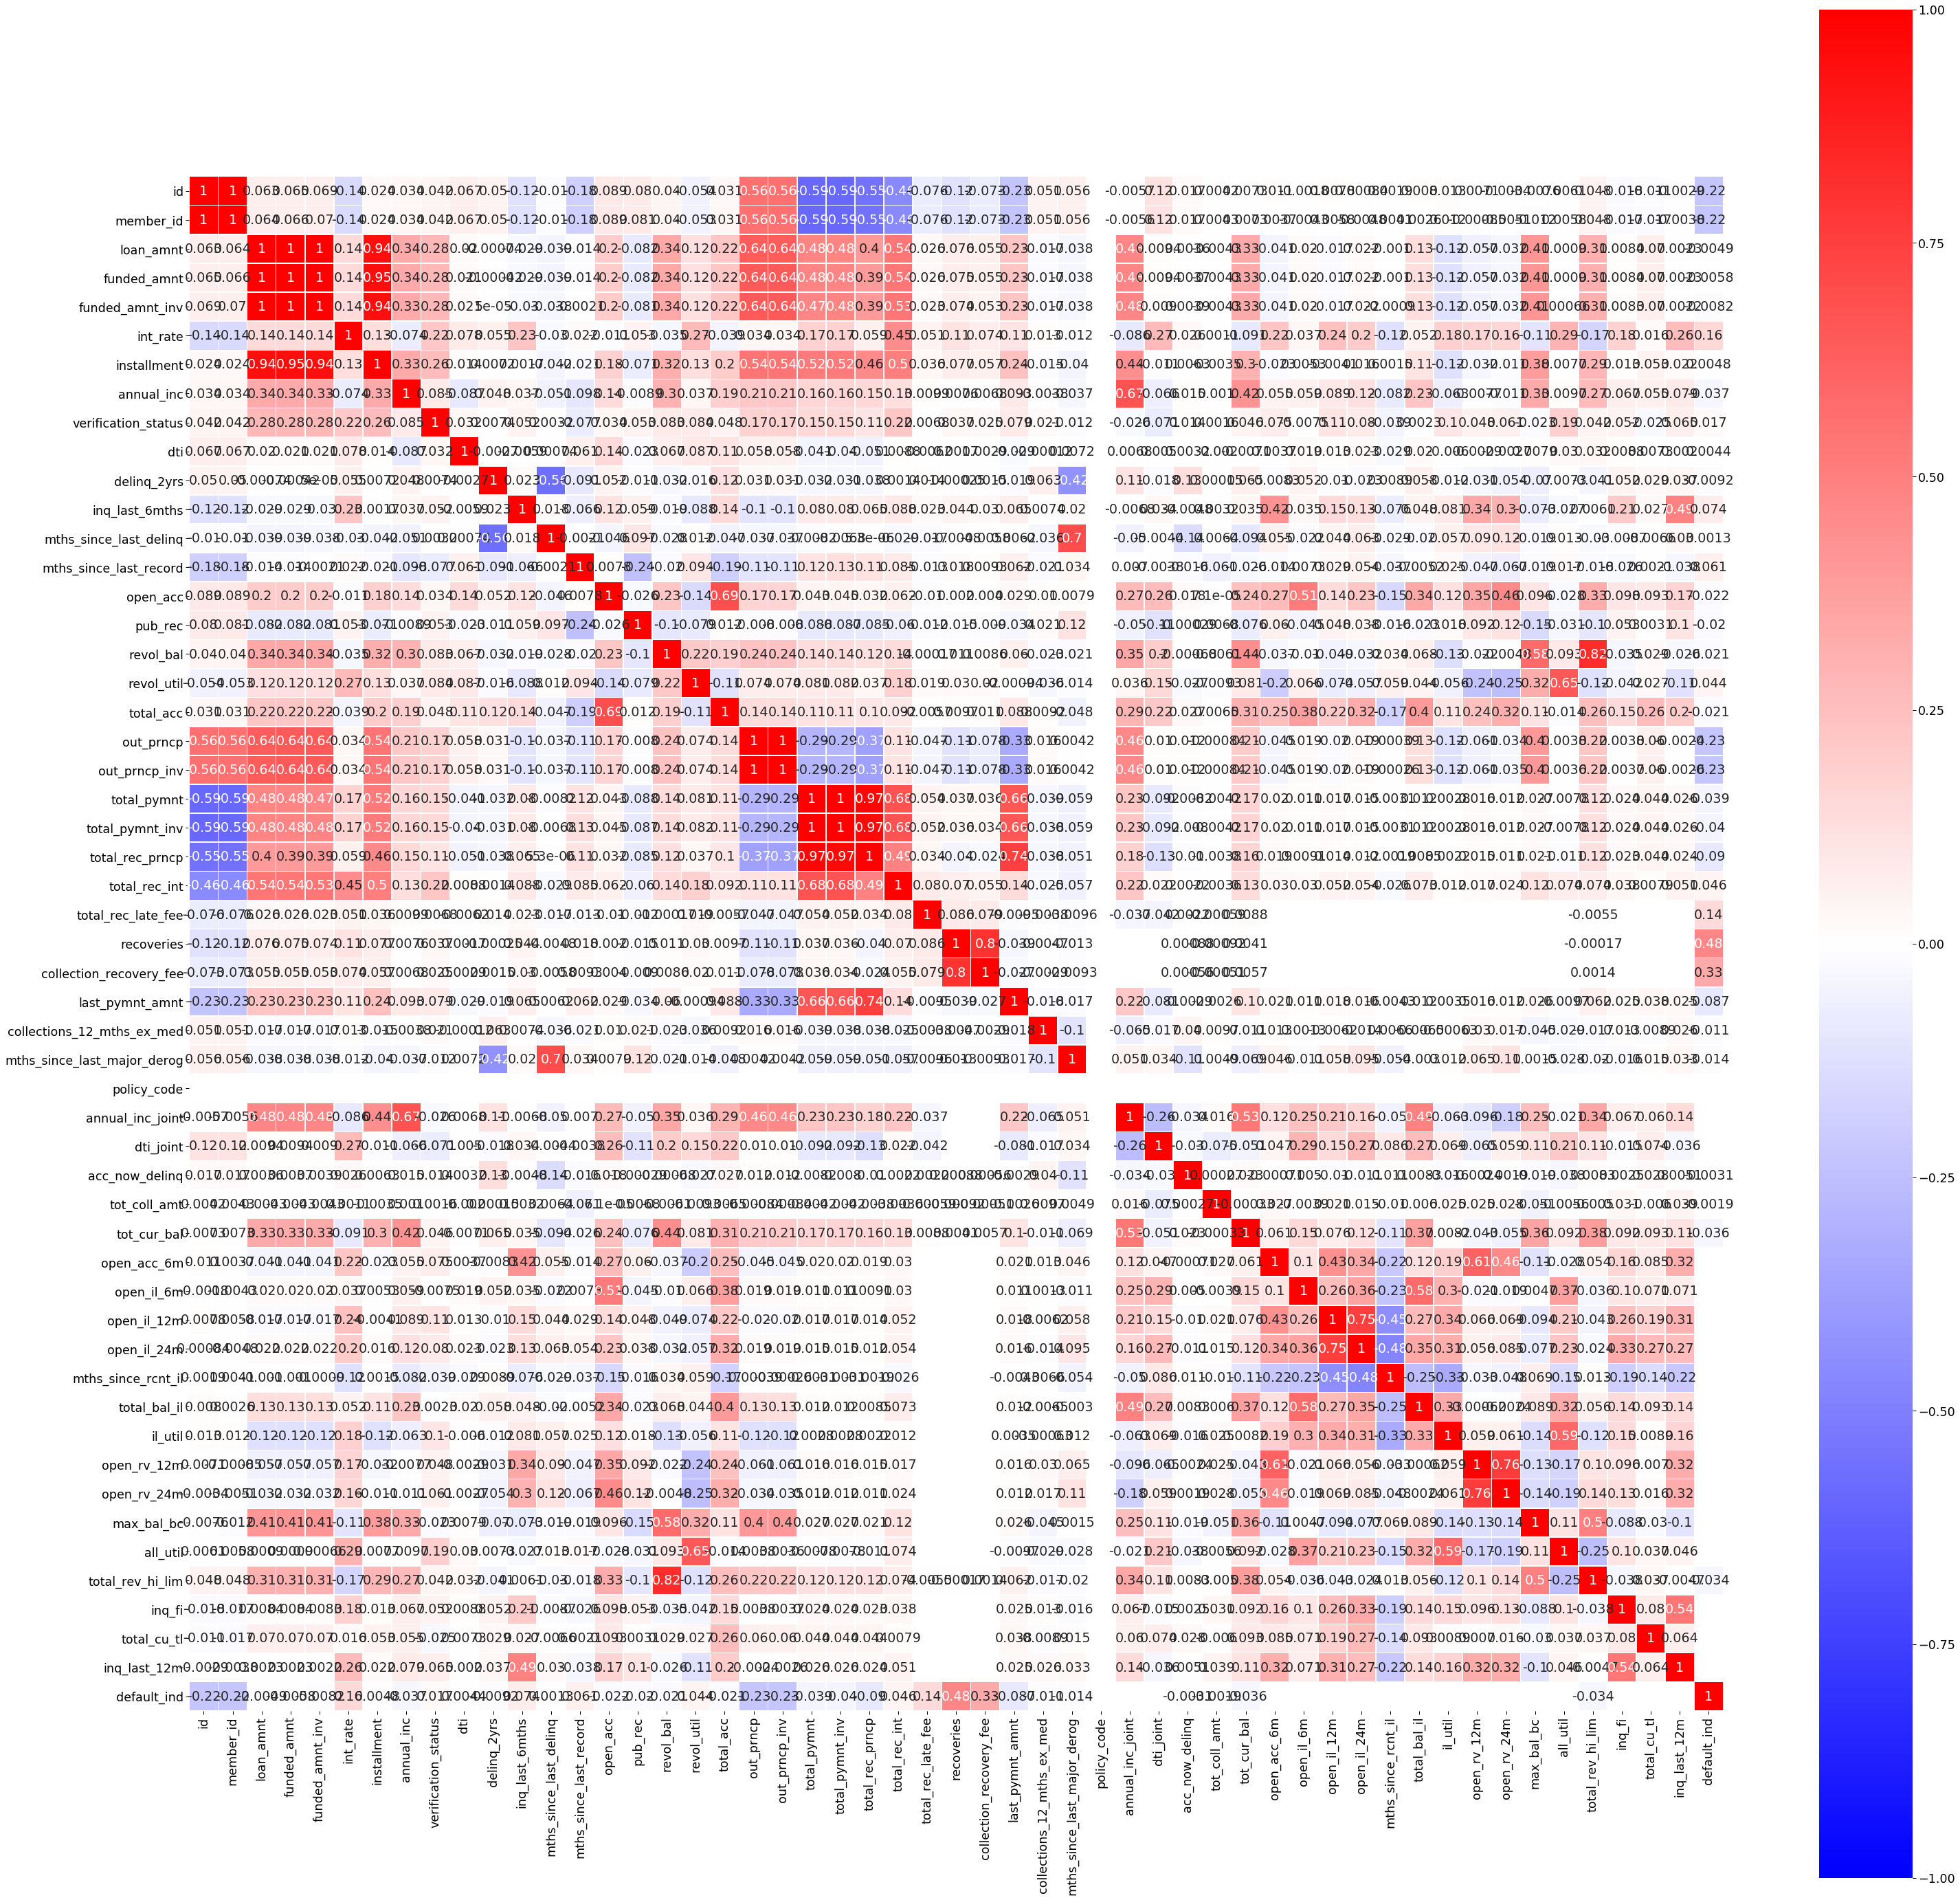

In [9]:
corrmatrix = data.corr()
plt.figure(figsize=(50,50))
sns.set_context("paper", font_scale=2)
sns.heatmap(corrmatrix,annot = True,cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.show()

In [10]:
corrmatrix

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
id,1.000000,0.999431,0.062971,0.065192,0.069491,-0.143769,0.023647,0.034160,0.041789,0.066580,0.049909,-0.118742,-0.010065,-0.181457,0.089238,0.080289,0.039686,-0.053538,0.031148,0.561560,0.561523,-0.593428,-0.589995,-0.553231,-0.457397,-0.075917,-0.115269,-0.073399,-0.228774,0.050921,0.056368,NaN,-0.005750,0.116850,0.016849,0.004233,0.007261,0.010564,-0.001811,0.007829,0.000842,0.001937,0.007998,0.013405,0.007088,-0.003373,-0.007643,0.006093,0.048011,-0.018001,-0.010882,-0.002882,-0.219832
member_id,0.999431,1.000000,0.063603,0.065862,0.070248,-0.142996,0.024311,0.034338,0.042263,0.066620,0.050174,-0.118790,-0.010264,-0.180839,0.089345,0.080976,0.039704,-0.053263,0.031311,0.561980,0.561943,-0.592951,-0.589419,-0.552938,-0.456508,-0.076341,-0.115341,-0.073358,-0.228243,0.051038,0.056395,NaN,-0.005593,0.116899,0.016960,0.004266,0.007284,0.003695,-0.004255,0.005830,-0.004794,0.004134,0.002638,0.012130,-0.000846,-0.005103,-0.011519,0.005834,0.047950,-0.016814,-0.016502,-0.003798,-0.220181
loan_amnt,0.062971,0.063603,1.000000,0.999265,0.997601,0.142966,0.944870,0.335209,0.279109,0.020189,-0.000739,-0.028928,-0.039230,-0.014055,0.198926,-0.082199,0.337489,0.119635,0.222084,0.639784,0.639786,0.479612,0.480328,0.395880,0.537586,0.025966,0.075513,0.055135,0.233596,-0.017042,-0.037766,NaN,0.475160,0.009429,0.003572,-0.004272,0.329130,-0.040545,0.020432,-0.016527,0.022069,-0.001027,0.131184,-0.121653,-0.057238,-0.031823,0.409959,0.000898,0.312072,0.008436,0.069555,0.002321,-0.004907
funded_amnt,0.065192,0.065862,0.999265,1.000000,0.998485,0.143116,0.945903,0.335002,0.278932,0.020583,-0.000424,-0.029279,-0.039290,-0.014354,0.199432,-0.081858,0.337405,0.120147,0.222039,0.641706,0.641709,0.478290,0.479172,0.394669,0.536533,0.025579,0.075076,0.054898,0.233134,-0.016887,-0.037759,NaN,0.475160,0.009429,0.003675,-0.004272,0.329128,-0.040545,0.020432,-0.016527,0.022069,-0.001027,0.131184,-0.121653,-0.057238,-0.031823,0.409959,0.000898,0.312071,0.008436,0.069555,0.002321,-0.005797
funded_amnt_inv,0.069491,0.070248,0.997601,0.998485,1.000000,0.143374,0.944149,0.334356,0.280207,0.021489,0.000050,-0.030462,-0.037936,-0.002055,0.200055,-0.081008,0.336870,0.120931,0.222258,0.644011,0.644023,0.474600,0.478589,0.391010,0.534517,0.023091,0.073737,0.053082,0.232029,-0.016556,-0.037724,NaN,0.475524,0.009044,0.003856,-0.004271,0.329152,-0.040695,0.020389,-0.016742,0.021854,-0.000898,0.131118,-0.121781,-0.057414,-0.031947,0.410088,0.000660,0.312107,0.008330,0.069587,0.002150,-0.008209
int_rate,-0.143769,-0.142996,0.142966,0.143116,0.143374,1.000000,0.130468,-0.073825,0.217409,0.078454,0.055400,0.231705,-0.030431,0.022205,-0.011091,0.052596,-0.035344,0.271687,-0.039482,0.033933,0.033790,0.173387,0.174453,0.059298,0.446517,0.050743,0.110848,0.074360,0.107346,0.012841,-0.011622,NaN,-0.086210,0.272316,0.026476,0.001129,-0.091430,0.219090,0.036509,0.243683,0.195798,-0.117528,0.051720,0.184945,0.165420,0.157374,-0.108673,0.294135,-0.165533,0.175376,0.016485,0.258051,0.155037
installment,0.023647,0.024311,0.944870,0.945903,0.944149,0.130468,1.000000,0.328578,0.261919,0.013909,0.007224,0.001659,-0.042336,-0.020774,0.183817,-0.071114,0.320017,0.131928,0.199872,0.539840,0.539835,0.520613,0.521332,0.455444,0.502038,0.035728,0.076931,0.057180,0.243246,-0.014565,-0.039536,NaN,

Removing the columns that have high correlation and deduce almost the same information

In [11]:
data = data.drop(["id", "funded_amnt","funded_amnt_inv", "out_prncp_inv", "total_pymnt_inv"], axis = 1)

# Visualizing Missing Values in the Data with Heatmap

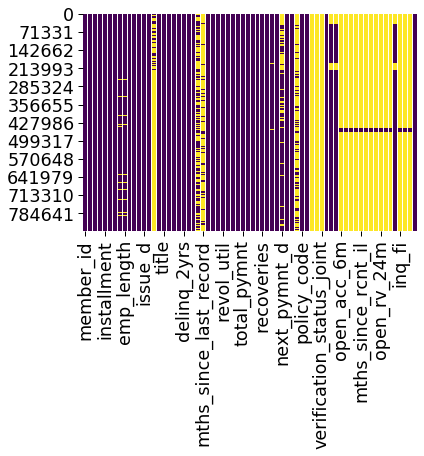

In [12]:
sns.heatmap(data.isnull(), cbar = False, cmap = "viridis")

# Checking the number of missing values and it's percentage in each column

In [13]:
missing_data = pd.DataFrame({"Count" : data.isna().sum(), "Percent" :  100*(data.isna().sum()/ len(data))})
missing_data = missing_data[missing_data["Count"] > 0]
missing_data.sort_values(by = ["Count", "Percent"], ascending = False)

,Count,Percent
dti_joint,855529,99.948596
annual_inc_joint,855527,99.948363
verification_status_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_12m,842681,98.447607
open_il_24m,842681,98.447607
total_bal_il,842681,98.447607


Checking the count of joint and individual application type

In [14]:
data["application_type"].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

Since there are very few observations for joint application type, we choose to drop columns relating joint field as they also contain more than 99% missing data

In [15]:
data = data.drop(["dti_joint", "annual_inc_joint", "verification_status_joint", "application_type"], axis = 1)

Dropping columns that do not reveal much information due to huge missing value percentage

In [16]:
data = data.drop(["il_util", "mths_since_rcnt_il", "open_acc_6m", "open_il_6m", "open_il_12m","open_il_24m","total_bal_il","open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util", "inq_fi", "total_cu_tl", "inq_last_12m", "desc", "mths_since_last_record" ], axis = 1)

Dropping variables that don't seem to be of much value

In [17]:
data = data.drop(["member_id", "zip_code", "addr_state", "sub_grade", "title"], axis = 1)

# Imputation of Missing Values

Imputing "Month since last major derog"

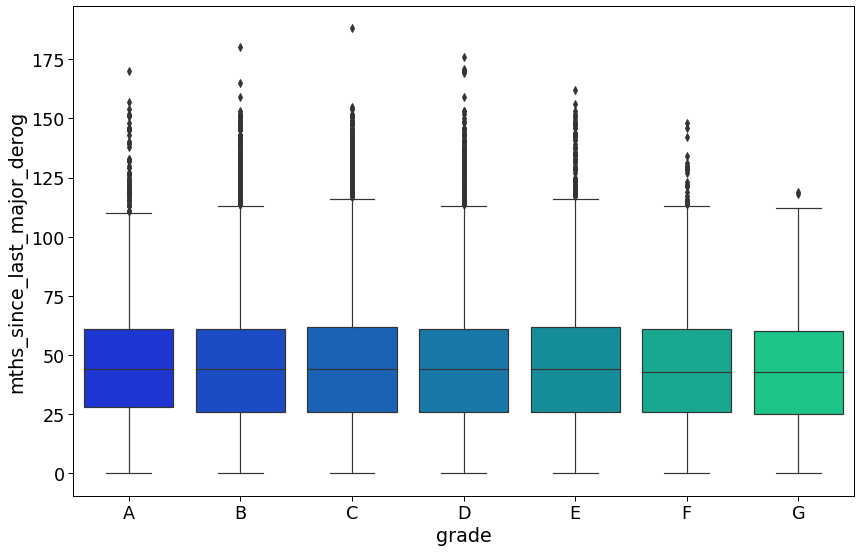

In [18]:
plt.figure(figsize= (14,9))
sns.boxplot(x = "grade", y = "mths_since_last_major_derog", data = data, palette = "winter", order = ["A", "B", "C", "D", "E", "F", "G"])

In [19]:
# Checking whether there is a significant relationship between "grade" and "mths_since_last_delinq" by applying annova test
formula = 'mths_since_last_major_derog ~ C(grade)'
model = ols(formula, data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                sum_sq        df         F    PR(>F)
C(grade)  1.401342e+04       6.0  4.754524  0.000075
Residual  1.046971e+08  213132.0       NaN       NaN


In [20]:
#Finding the mean and median of "Month since last major derogacy" wrt grade
data.groupby("grade")["mths_since_last_major_derog"].agg(["mean", "median"])

,mean,median
grade,,
A,44.399147,44.0
B,43.818358,44.0
C,44.338775,44.0
D,44.102446,44.0
E,44.071474,44.0
F,43.644042,43.0
G,42.878369,43.0


In [21]:
# Defining function for imputation for the column of "mths_since_last_major_derog" by mean of grade's group
def impute_last_derog(cols):
    mths_since_last_major_derog = cols[0]
    grade = cols[1]
    
    if pd.isnull(mths_since_last_major_derog):
        if grade == "A":
            return 44.399147
        elif grade == "B":
            return 43.818358
        elif grade == "C":
            return 44.338775
        elif grade == "D":
            return 44.102446
        elif grade == "E":
            return 44.071474
        elif grade == "F":
            return 43.644042
        else:
            return 42.878369
        
    else:
        return mths_since_last_major_derog
        

In [22]:
# Imputing the column of "mths_since_last_major_derog" by mean of grade's group
data["mths_since_last_major_derog"] = data[["mths_since_last_major_derog", "grade"]].apply(impute_last_derog, axis = 1)

Imputing "Month since last delinq" wrt Grade

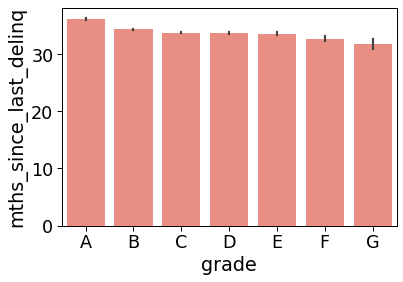

In [23]:
sns.barplot(x="grade", y="mths_since_last_delinq" ,data = data, color = 'salmon' ,order= ["A", "B", "C", "D", "E", "F", "G"])

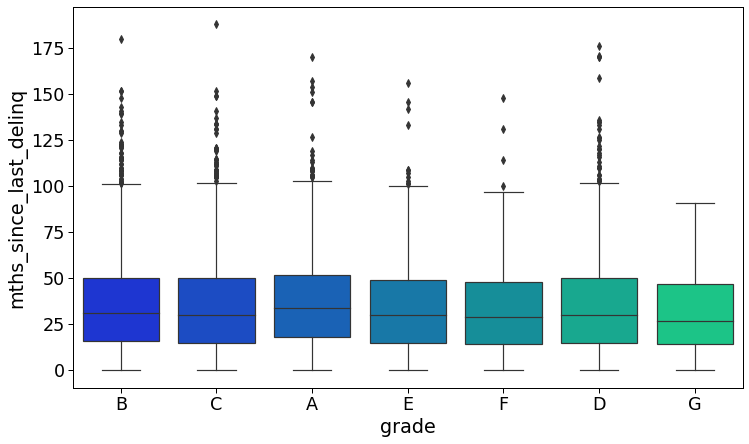

In [24]:
plt.figure(figsize= (12,7))
sns.boxplot(x = "grade", y = "mths_since_last_delinq", data = data, palette = "winter")

In [25]:
# Checking whether there is a significant relationship between "grade" and "mths_since_last_delinq" by applying annova test
formula = 'mths_since_last_delinq ~ C(grade)'
model = ols(formula, data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                sum_sq        df          F         PR(>F)
C(grade)  2.836699e+05       6.0  99.000474  5.650266e-125
Residual  1.987352e+08  416150.0        NaN            NaN


In [26]:
# Finding the mean and median of month since last delinq wrt grade
data.groupby("grade")["mths_since_last_delinq"].agg(["mean", "median"])

,mean,median
grade,,
A,36.051912,34.0
B,34.303024,31.0
C,33.762167,30.0
D,33.714933,30.0
E,33.554391,30.0
F,32.683753,29.0
G,31.715229,27.0


In [27]:
# Defining function for imputation for the column of "mths_since_last_major_derog" by mean of grade's group
def impute_last_delinq(cols):
    mths_since_last_delinq = cols[0]
    grade = cols[1]
    
    if pd.isnull(mths_since_last_delinq):
        if grade == "A":
            return 34
        elif grade == "B":
            return 31
        elif grade == "C":
            return 30
        elif grade == "D":
            return 30
        elif grade == "E":
            return 30
        elif grade == "F":
            return 29
        else:
            return 27
        
    else:
        return mths_since_last_delinq
        

In [28]:
# Imputing the column of "mths_since_last_major_derog" by mean of grade's group
data["mths_since_last_delinq"] = data[["mths_since_last_delinq", "grade"]].apply(impute_last_delinq, axis = 1)

Imputation of "Total Curent Balance"

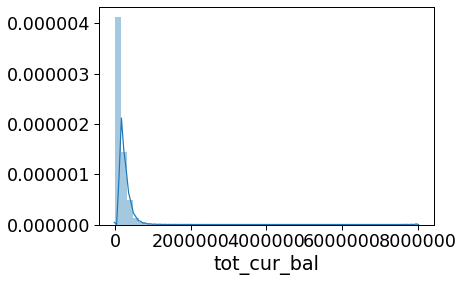

In [29]:
sns.distplot(data["tot_cur_bal"])

In [30]:
data["tot_cur_bal"].agg(["mean", "min", "max", "median"])

mean      1.397662e+05
min       0.000000e+00
max       8.000078e+06
median    8.100850e+04
Name: tot_cur_bal, dtype: float64

In [31]:
data["tot_cur_bal"] = data["tot_cur_bal"].fillna(data["tot_cur_bal"].median())

Imputation of "Total Collection Amount"

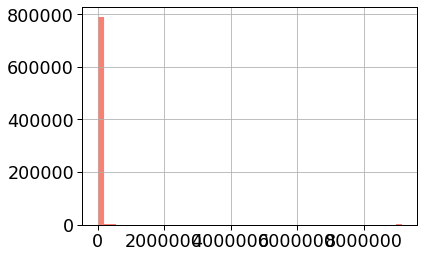

In [32]:
data['tot_coll_amt'].hist(bins=50,color = 'salmon' )

In [33]:
data["tot_coll_amt"].agg(["min", "max", "mean", "median"])

min       0.000000e+00
max       9.152545e+06
mean      2.254129e+02
median    0.000000e+00
Name: tot_coll_amt, dtype: float64

In [34]:
data["tot_coll_amt"] = data["tot_coll_amt"].fillna(data["tot_coll_amt"].median())

Imputing "Total revolving high limit"

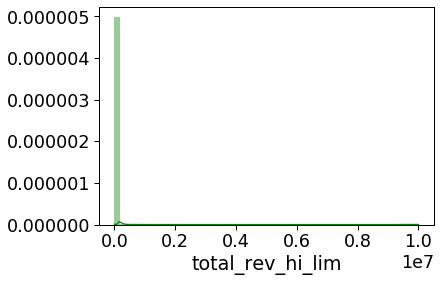

In [35]:
sns.distplot(data["total_rev_hi_lim"], color = "green")

In [36]:
# Checking the relationship between "Total_rev_hi_lim" wrt default 
formula = 'total_rev_hi_lim ~ C(default_ind)'
model = ols(formula, data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                      sum_sq        df           F         PR(>F)
C(default_ind)  1.266956e+12       1.0  892.437557  5.567005e-196
Residual        1.119619e+15  788654.0         NaN            NaN


In [37]:
data.groupby("default_ind")["total_rev_hi_lim"].agg(["mean", "median"])

,mean,median
default_ind,,
0,32442.502709,24000.0
1,26404.117156,20500.0


In [38]:
data["total_rev_hi_lim"] = np.where(data["default_ind"] == 1, 20500.0, 24000.0)

Dropping "emp_title" as it does not reveal too much information and has many different categories

In [39]:
data = data.drop(["emp_title"], axis = 1)

Imputing "Employment Length"

In [40]:
data["emp_length"] = pd.to_numeric(data["emp_length"])

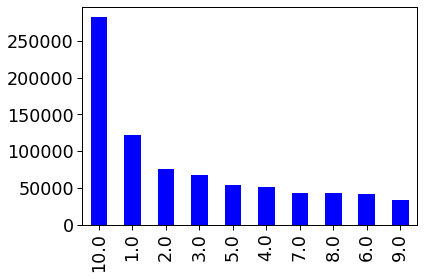

In [41]:
data['emp_length'].value_counts().plot.bar(color = "blue")

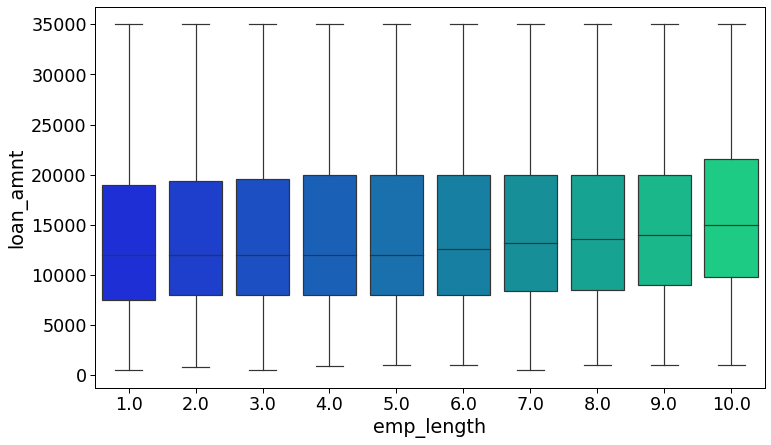

In [42]:
plt.figure(figsize= (12,7))
sns.boxplot(x = "emp_length", y = "loan_amnt", data = data, palette = "winter")

In [43]:
data.groupby("emp_length")["loan_amnt"].agg(["mean", "median"])

,mean,median
emp_length,,
1.0,13779.239212,12000.0
2.0,14004.208012,12000.0
3.0,14126.785449,12000.0
4.0,14241.293466,12000.0
5.0,14321.353509,12000.0
6.0,14525.974159,12600.0
7.0,14754.290691,13200.0
8.0,14950.269913,13600.0
9.0,15167.356255,14000.0


In [44]:
# Defining function for imputation for the column of "emp_length" by median of loan amount group
def impute_emp_length(cols):
    emp_length = cols[0]
    loan_amnt = cols[1]
    
    if pd.isnull(emp_length):
        if loan_amnt <= 12000.0:
            return 3.0
        elif (loan_amnt > 12000.0) & (loan_amnt <= 12600.0):
            return 6.0
        elif (loan_amnt > 12600.0) & (loan_amnt <= 13200.0):
            return 7.0
        elif (loan_amnt > 13200.0) & (loan_amnt <= 13600.0):
            return 8.0
        elif (loan_amnt > 13600.0) & (loan_amnt <= 14000.0):
            return 9.0
        
        else:
            return 10.0
        
    else:
        return emp_length
        

In [45]:
data["emp_length"] = data[["emp_length", "loan_amnt"]].apply(impute_emp_length, axis = 1)

Imputing "Revolving Utilization"

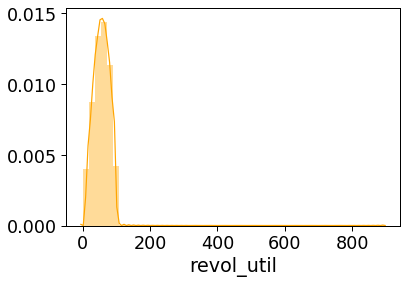

In [46]:
sns.distplot(data["revol_util"], color = "orange")

In [47]:
data["revol_util"].agg(["mean", "median", "min", "max"])

mean       55.019405
median     55.900000
min         0.000000
max       892.300000
Name: revol_util, dtype: float64

In [48]:
data["revol_util"] = data["revol_util"].fillna(data["revol_util"].median())

Dropping missing values in "Collection 12 month excluding medical"

In [49]:
data["collections_12_mths_ex_med"].fillna(0, inplace = True)

Checking outliers per column

In [50]:
data1 = data._get_numeric_data()
q1 = data1.quantile(0.25)
q3 = data1.quantile(0.75)
iqr = q3 - q1
((data1<(q1 - 1.5*iqr))| (data1 > (q3 +1.5* iqr))).sum().sort_values()

loan_amnt                           0
policy_code                         0
emp_length                          0
verification_status                 0
revol_util                         44
dti                                70
out_prncp                        3661
acc_now_delinq                   3930
int_rate                         5918
total_rec_late_fee               9974
collections_12_mths_ex_med      11145
total_acc                       17444
installment                     22410
collection_recovery_fee         23035
recoveries                      24187
open_acc                        26338
tot_cur_bal                     34378
annual_inc                      38304
total_pymnt                     44450
default_ind                     46467
total_rev_hi_lim                46467
revol_bal                       46665
inq_last_6mths                  49842
total_rec_prncp                 56641
total_rec_int                   61641
tot_coll_amt                   111594
pub_rec     

# Exploratory Data Analysis

Graph between "Default_ind" and "Interest Rate"

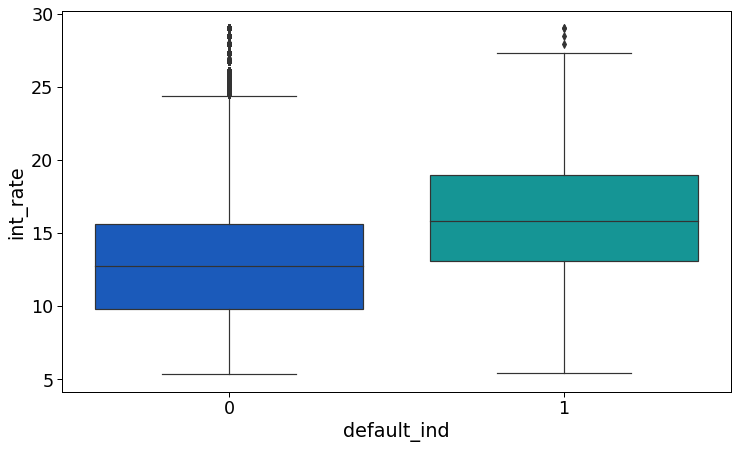

In [51]:
plt.figure(figsize= (12,7))
sns.boxplot(x = "default_ind", y = "int_rate", data = data, palette = "winter")

# Higher interest rate led to more default cases

Checking the distribution of "Loan Amount"

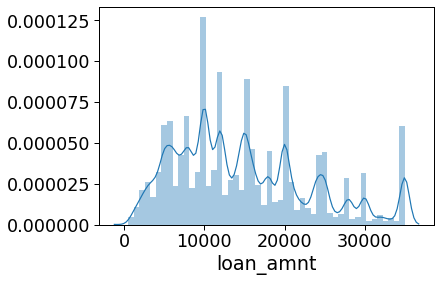

In [52]:
sns.distplot(data.loc[data['loan_amnt'].notnull(), 'loan_amnt'], kde=True)

Graph between "Default_ind" and "Loan Amount"

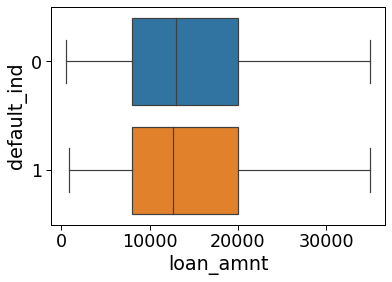

In [53]:
data["default_ind"] = data["default_ind"].astype('category')
sns.boxplot(x='loan_amnt', y='default_ind', data=data)

# Non-Defaulters had higher annual income

Graph for "Interest Rate"

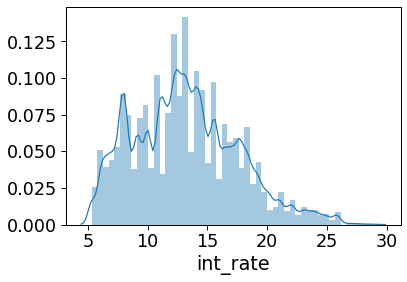

In [54]:
sns.distplot(data.loc[data['int_rate'].notnull(), 'int_rate'], kde=True)

Graph for "Installment"

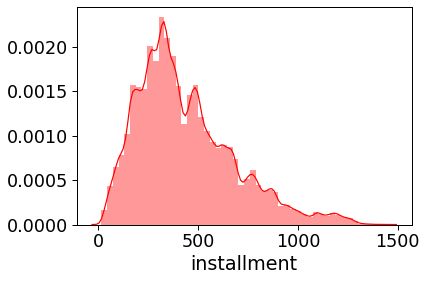

In [55]:
sns.distplot(data.loc[data['installment'].notnull(), 'installment'], kde=True, color = "red")

Graph between "Installment" and "Default_ind"

In [56]:
data.groupby('default_ind')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,435.960525,243.546926,15.69,260.46,382.22,571.56,1445.46
1,46467.0,441.073219,246.793319,21.62,265.81,391.17,573.32,1424.57


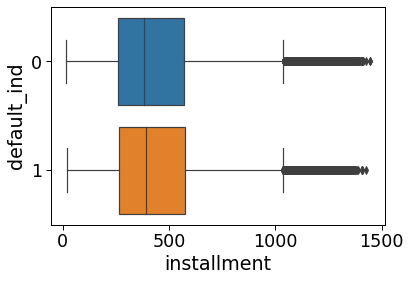

In [57]:
sns.boxplot(x='installment', y='default_ind', data=data)

# Higher installments led to more default cases

CountPlot showcasing the distribution of "Grade"

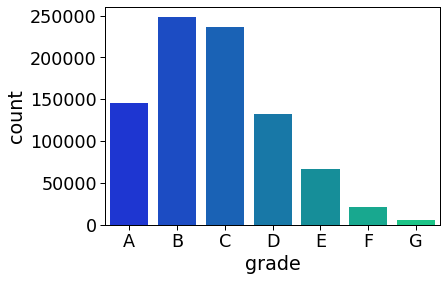

In [58]:
sns.countplot(data['grade'], order=sorted(data['grade'].unique()), palette = "winter")

Bar Plot between "Default_ind" and "Grade"

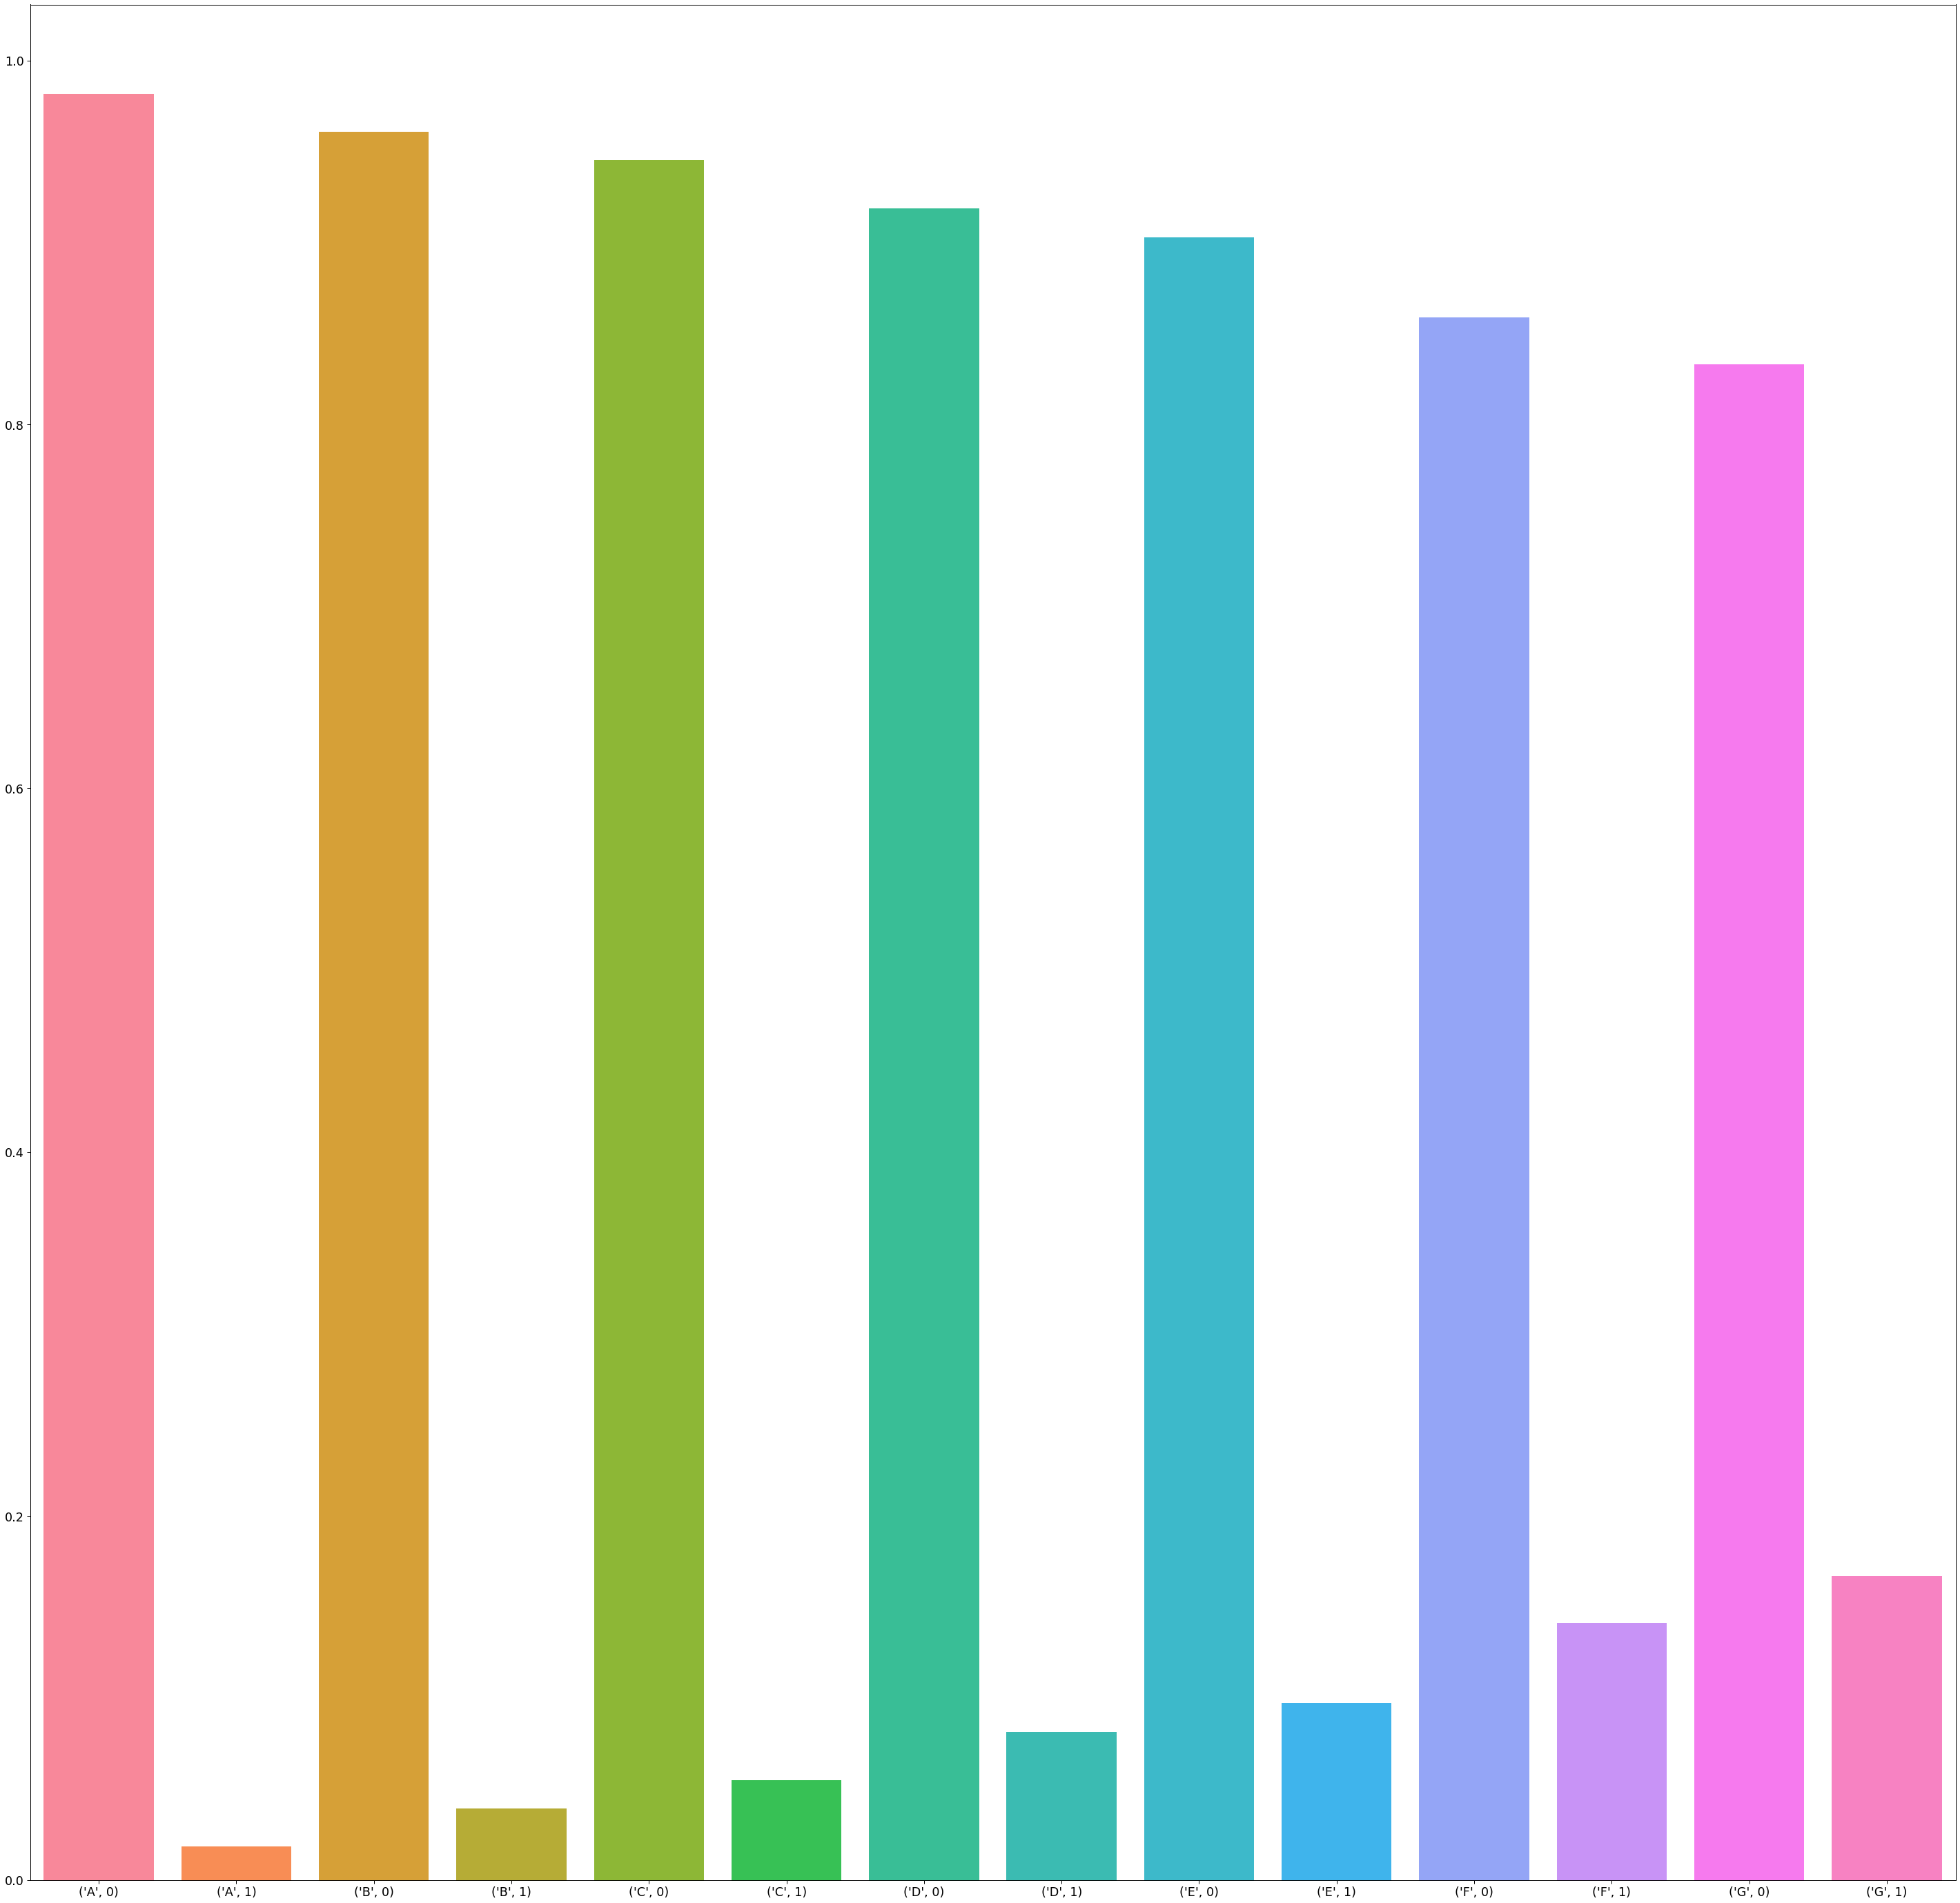

In [59]:
plt.figure(figsize=(50,50))
charge_off_rates = data.groupby(['grade'])['default_ind'].value_counts(normalize=True)
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, saturation=1)

# As the grade inceases from A to G, the number of default cases also increase.

CountPlot showcasing the distribution of "Purpose"

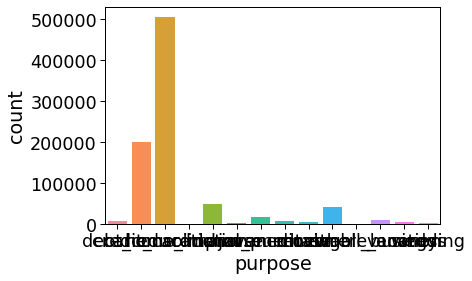

In [60]:
sns.countplot(data['purpose'], order=sorted(data['purpose'].unique()), saturation=1)

In [62]:
data.groupby('purpose')['default_ind'].value_counts(normalize=True)

purpose             default_ind
car                 0              0.946701
                    1              0.053299
credit_card         0              0.959734
                    1              0.040266
debt_consolidation  0              0.943828
                    1              0.056172
educational         0              0.828221
                    1              0.171779
home_improvement    0              0.953639
                    1              0.046361
house               0              0.916596
                    1              0.083404
major_purchase      0              0.946464
                    1              0.053536
medical             0              0.928720
                    1              0.071280
moving              0              0.915504
                    1              0.084496
other               0              0.926714
                    1              0.073286
renewable_energy    0              0.901639
                    1              0.098361


Plot for distribution of "dti"

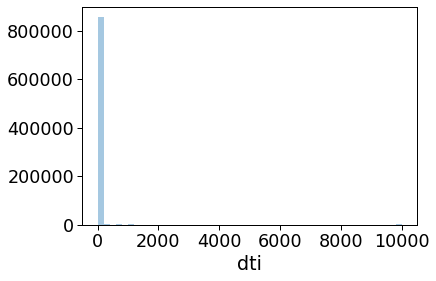

In [63]:
sns.distplot(data.loc[data['dti'].notnull(), 'dti'], kde=False)

In [64]:
data.groupby('default_ind')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,18.103677,17.815005,0.0,11.84,17.57,23.88,9999.00
1,46467.0,18.444234,7.950591,0.0,12.61,18.38,24.14,39.98


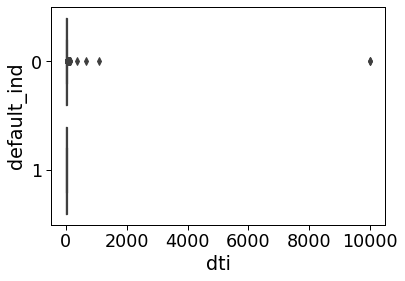

In [65]:
sns.boxplot(x='dti', y='default_ind', data=data)

# Dti ratio for for Defaulters is higher.

Distribution of "Dti"

Text(0.5, 1.0, 'Debt-to-income Ratio')

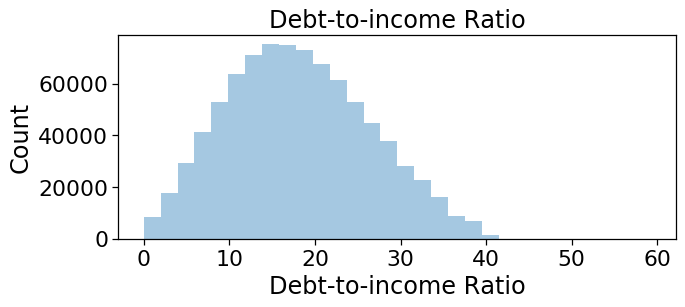

In [68]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(data.loc[data['dti'].notnull() & (data['dti']<60), 'dti'], bins = 30, kde = False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

Distribution for "Earliest Credit Line"

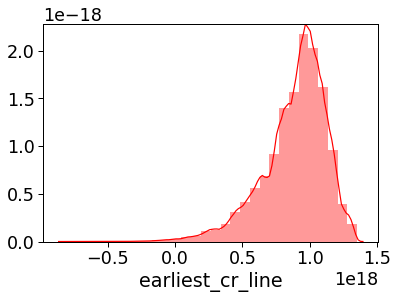

In [70]:
sns.distplot(data.loc[data['earliest_cr_line'].notnull(), 'earliest_cr_line'], kde=True, color = "red", bins = 30)

Distribution of "Open Account" 

Text(0.5, 1.0, 'Number of Open Credit Lines')

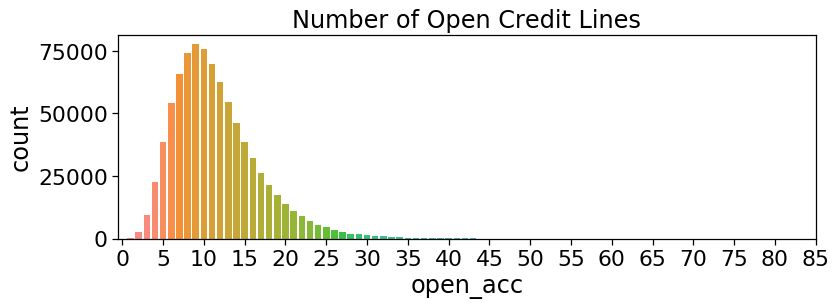

In [71]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(data['open_acc'], order=sorted(data['open_acc'].unique()), saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [72]:
data.groupby('default_ind')['open_acc'].describe()

# Number of open credit lines in case of defaulters was higher.

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,11.570042,5.327422,0.0,8.0,11.0,14.0,90.0
1,46467.0,11.061721,4.934646,0.0,8.0,10.0,14.0,76.0


Description and distribution for "Revolving Balance"

In [73]:
data['revol_bal'].describe()

count    8.559690e+05
mean     1.691053e+04
std      2.222374e+04
min      0.000000e+00
25%      6.469000e+03
50%      1.190300e+04
75%      2.085700e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

In [74]:
# Log Transformation

data['log_revol_bal'] = data['revol_bal'].apply(lambda x: np.log10(x+1))

In [75]:
data.drop('revol_bal', axis=1, inplace=True)

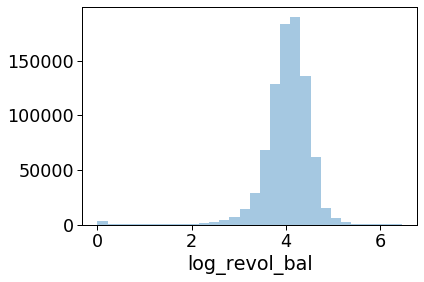

In [76]:
sns.distplot(data.loc[data['log_revol_bal'].notnull(), 'log_revol_bal'], kde=False, bins = 30)

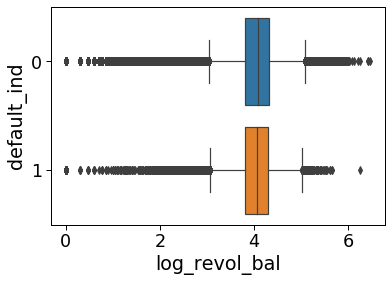

In [77]:
sns.boxplot(x='log_revol_bal', y='default_ind', data=data)

# Revolving Balance for defaulters is higher.

In [78]:
data.groupby('default_ind')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,4.032126,0.493767,0.0,3.811709,4.077004,4.321510,6.463122
1,46467.0,3.986204,0.531501,0.0,3.794314,4.054996,4.283618,6.242223


Graph for "Revolving Utilization"

In [79]:
data['revol_util'].describe()

count    855969.000000
mean         55.019863
std          23.805389
min           0.000000
25%          37.600000
50%          55.900000
75%          73.500000
max         892.300000
Name: revol_util, dtype: float64

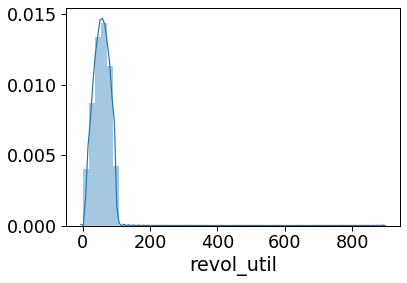

In [80]:
sns.distplot(data.loc[data['revol_util'].notnull(), 'revol_util'], kde=True)

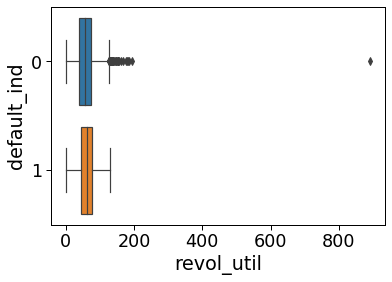

In [81]:
sns.boxplot(x='revol_util', y='default_ind', data=data)

# Revolving Utilization is higher in the case of Defaulters.

Distribution of "Total Account"

Text(0.5, 1.0, 'Total Number of Credit Lines')

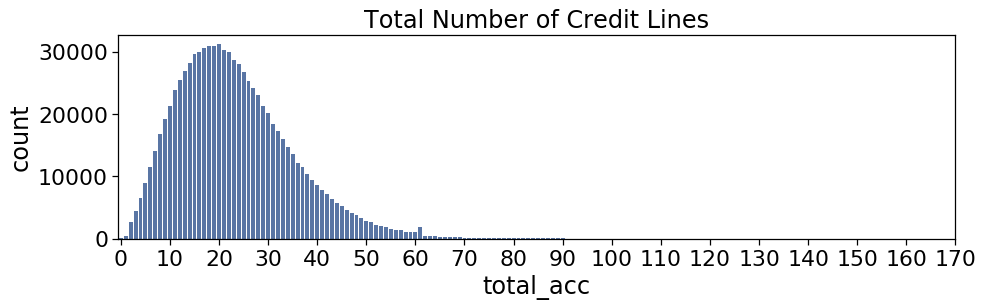

In [82]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(data['total_acc'], order=sorted(data['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [83]:
data.groupby('default_ind')['total_acc'].describe()

# Total number of accounts is higher for Defaulters.

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,25.328980,11.832300,2.0,17.0,24.0,32.0,169.0
1,46467.0,24.229044,11.532493,2.0,16.0,23.0,31.0,110.0


Graph between "Default_ind" and "Initial List Status"

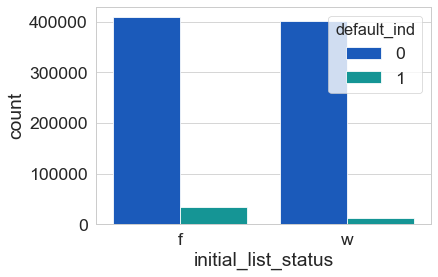

In [84]:
sns.set_style("whitegrid")
sns.countplot(x = "initial_list_status", hue = "default_ind", data = data, palette = "winter")

# Cases of default are more where the initial list status is "f"

Relationship between "Outstanding Principal" and "Default_ind"

In [85]:
data['out_prncp'].describe()

count    855969.000000
mean       8284.830230
std        8461.946669
min           0.000000
25%           0.000000
50%        6290.250000
75%       13528.800000
max       49372.860000
Name: out_prncp, dtype: float64

In [86]:
data.groupby('default_ind')['out_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,8742.935227,8459.681842,0.0,0.0,7000.0,13967.525,49372.86
1,46467.0,304.179196,2219.353977,0.0,0.0,0.0,0.000,35000.00


Relationship between "Total Payment" and "Default_ind"

In [87]:
data.groupby('default_ind')['total_pymnt'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,7727.617212,8022.383433,0.0,1935.47,4987.625,10897.215,57777.57987
1,46467.0,6358.551737,5424.353661,0.0,2496.36,4855.880,8606.465,46199.44000


Relationship between "Total received interest" and "Default_ind"

In [88]:
data.groupby('default_ind')['total_rec_int'].describe()

# Interest received in case of Defaulters was much higher than that for Non-Defaulters

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,1732.078891,2069.678105,0.0,439.950,1056.46,2202.2675,24205.62
1,46467.0,2155.160268,2243.479601,0.0,686.065,1434.08,2778.5300,20610.17


Relationship between "Total received late fee" and "Default_ind"

In [89]:
data.groupby('default_ind')['total_rec_late_fee'].describe()

# Total late fee received was much higher for Defaluters.

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,0.197805,2.772227,0.0,0.0,0.0,0.0,286.747566
1,46467.0,2.440093,10.067126,0.0,0.0,0.0,0.0,358.680000


Relationship between "Recoveries" and "Default_ind"

In [90]:
data.groupby('default_ind')['recoveries'].describe()

# Recoveries for Defaulters was much higher than in the case of Non-Defaulters

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,0.000000,0.00000,0.0,0.0,0.00,0.000,0.00
1,46467.0,867.436067,1559.67106,0.0,0.0,16.25,1214.165,33520.27


Relationship between "Account now Delinquent" and "Default_ind"

In [91]:
data.groupby('default_ind')['acc_now_delinq'].describe()

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,0.005002,0.077696,0.0,0.0,0.0,0.0,14.0
1,46467.0,0.003938,0.070703,0.0,0.0,0.0,0.0,5.0


Relationship between "Total collection amount" and "Default_ind"

In [92]:
data.groupby('default_ind')['tot_coll_amt'].describe() 

# Mean collection amount is less for Non-Defaulters

,count,mean,std,min,25%,50%,75%,max
default_ind,,,,,,,,
0,809502.0,213.583622,10349.976442,0.0,0.0,0.0,0.0,9152545.0
1,46467.0,104.953042,1152.924656,0.0,0.0,0.0,0.0,95806.0


Graph between "Term" and "Default_ind"

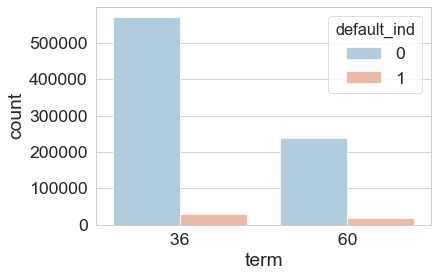

In [93]:
sns.set_style("whitegrid")
sns.countplot(x = "term", hue = "default_ind", data = data, palette = "RdBu_r")

Distribution for "Total Payment"

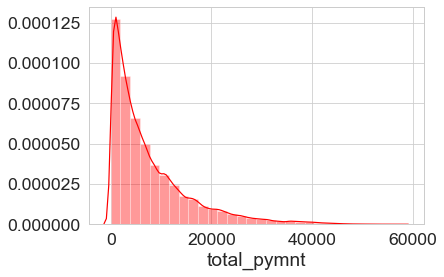

In [94]:
sns.distplot(data["total_pymnt"], kde = True, color = "red", bins = 30)

In [95]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind', 'log_revol_bal'],
      dtype='object')

Data encoding for "Grade" and "Payment Plan"

In [96]:
data["grade"] = data["grade"].replace({"A": 1,"B": 2,"C": 3, "D":4, "E":5, "F":6, "G" :7})
data["pymnt_plan"] = data["pymnt_plan"].replace({"y" : 1, "n" : 0})

# One - Hot Encoding

In [97]:
home_ownership_new = pd.get_dummies(data["home_ownership"], drop_first = True)

In [98]:
purpose_new = pd.get_dummies(data["purpose"], drop_first = True)

In [99]:
initial_list_status_new = pd.get_dummies(data["initial_list_status"], drop_first = True)

In [100]:
data = data.drop(["home_ownership","purpose", "initial_list_status"], axis = 1)

In [101]:
data = pd.concat([data,home_ownership_new], axis = 1)

In [102]:
data = pd.concat([data, purpose_new], axis = 1)

In [103]:
data = pd.concat([data, initial_list_status_new], axis = 1)

In [104]:
data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,log_revol_bal,MORTGAGE,NONE,OTHER,OWN,RENT,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,w
0,5000.0,36,10.65,162.87,2,10.0,24000.0,1,2011-12-01,0,27.65,0.0,1985-01-01,1.0,31.0,3.0,0.0,83.7,9.0,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,43.818358,1.0,0.0,0.0,81008.5,24000.0,0,4.135101,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,3,1.0,30000.0,1,2011-12-01,0,1.00,0.0,1999-04-01,5.0,30.0,3.0,0.0,9.4,4.0,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,44.338775,1.0,0.0,0.0,81008.5,20500.0,1,3.227372,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,84.33,3,10.0,12252.0,0,2011-12-01,0,8.72,0.0,2001-11-01,2.0,30.0,2.0,0.0,98.5,10.0,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,44.338775,1.0,0.0,0.0,81008.5,24000.0,0,3.470851,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10000.0,36,13.49,339.31,3,10.0,49200.0,1,2011-12-01,0,20.00,0.0,1996-02-01,1.0,35.0,10.0,0.0,21.0,37.0,0.0,12226.302212,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,44.338775,1.0,0.0,0.0,81008.5,24000.0,0,3.748110,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3000.0,60,12.69,67.79,2,1.0,80000.0,1,2011-12-01,0,17.94,0.0,1996-01-01,0.0,38.0,15.0,0.0,53.9,38.0,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,43.818358,1.0,0.0,0.0,81008.5,24000.0,0,4.443795,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [105]:
data = data.drop(["earliest_cr_line", "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d"], axis = 1)

In [106]:
data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,log_revol_bal,MORTGAGE,NONE,OTHER,OWN,RENT,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,w
0,5000.0,36,10.65,162.87,2,10.0,24000.0,1,2011-12-01,0,27.65,0.0,1.0,31.0,3.0,0.0,83.7,9.0,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,43.818358,1.0,0.0,0.0,81008.5,24000.0,0,4.135101,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,3,1.0,30000.0,1,2011-12-01,0,1.00,0.0,5.0,30.0,3.0,0.0,9.4,4.0,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,0.0,44.338775,1.0,0.0,0.0,81008.5,20500.0,1,3.227372,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,84.33,3,10.0,12252.0,0,2011-12-01,0,8.72,0.0,2.0,30.0,2.0,0.0,98.5,10.0,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,44.338775,1.0,0.0,0.0,81008.5,24000.0,0,3.470851,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10000.0,36,13.49,339.31,3,10.0,49200.0,1,2011-12-01,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,37.0,0.0,12226.302212,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,44.338775,1.0,0.0,0.0,81008.5,24000.0,0,3.748110,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3000.0,60,12.69,67.79,2,1.0,80000.0,1,2011-12-01,0,17.94,0.0,0.0,38.0,15.0,0.0,53.9,38.0,766.9,3242.170000,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,43.818358,1.0,0.0,0.0,81008.5,24000.0,0,4.443795,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# Splitting by Date Column

In [107]:
X = data.loc[data['issue_d'] < '2015-07-01']
y = data.loc[data['issue_d'] >= '2015-07-01']

In [108]:
X.shape,y.shape

((626565, 54), (229404, 54))

In [109]:
X_train = X.drop(['default_ind','issue_d'],axis = 1)
y_train = X.default_ind
X_test = y.drop(['default_ind','issue_d'],axis = 1)
y_test = y.default_ind

# Feature selection using SelectKBest

In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func = chi2, k=20)
fit = bestfeatures.fit(X_train,y_train)

dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

featureScore = pd.concat([dfcolumns,dfscore],axis=1)
featureScore.columns = ['Specs','Score']
featureScore.head()

print(featureScore.nlargest(20,'Score'))

                      Specs         Score
22               recoveries  5.047462e+08
17                out_prncp  2.825697e+08
30              tot_cur_bal  2.453940e+08
19          total_rec_prncp  1.155737e+08
24          last_pymnt_amnt  9.546733e+07
18              total_pymnt  5.957159e+07
6                annual_inc  5.377838e+07
23  collection_recovery_fee  5.310622e+07
31         total_rev_hi_lim  2.212752e+07
29             tot_coll_amt  1.864266e+06
21       total_rec_late_fee  4.817571e+05
20            total_rec_int  7.341348e+04
2                  int_rate  2.384832e+04
15               revol_util  1.260399e+04
4                     grade  7.742304e+03
3               installment  4.839088e+03
11           inq_last_6mths  4.582624e+03
1                      term  3.292551e+03
51                        w  2.101930e+03
16                total_acc  2.011335e+03


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

# Simple Logistic Regression

In [112]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/Users/bhavikamehta/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of logistic regression classifier on test set: 1.00


In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[229243      1]
 [    38    122]]


In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       0.99      0.76      0.86       160

    accuracy                           1.00    229404
   macro avg       1.00      0.88      0.93    229404
weighted avg       1.00      1.00      1.00    229404



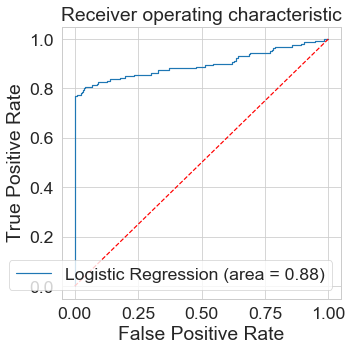

In [115]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Balancing Imbalanced DataSet

In [116]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

In [117]:
sm = SMOTE(sampling_strategy = 0.5, random_state = 2)

In [118]:
X_train['term'] = X_train['term'].astype(float)
X_train['grade'] = X_train['grade'].astype(float)
X_train['verification_status'] = X_train['verification_status'].astype(float)
X_train['pymnt_plan'] = X_train['pymnt_plan'].astype(float)
X_train['MORTGAGE'] = X_train['MORTGAGE'].astype(float)
X_train['NONE'] = X_train['NONE'].astype(float)
X_train['OTHER'] = X_train['OTHER'].astype(float)
X_train['OWN'] = X_train['OWN'].astype(float)
X_train['RENT'] = X_train['RENT'].astype(float)
X_train['credit_card'] = X_train['credit_card'].astype(float)
X_train['debt_consolidation'] = X_train['debt_consolidation'].astype(float)
X_train['educational'] = X_train['educational'].astype(float)
X_train['home_improvement'] = X_train['home_improvement'].astype(float)
X_train['house'] = X_train['house'].astype(float)
X_train['major_purchase'] = X_train['major_purchase'].astype(float)
X_train['medical'] = X_train['medical'].astype(float)
X_train['moving'] = X_train['moving'].astype(float)
X_train['other'] = X_train['other'].astype(float)
X_train['renewable_energy'] = X_train['renewable_energy'].astype(float)
X_train['small_business'] = X_train['small_business'].astype(float)
X_train['vacation'] = X_train['vacation'].astype(float)
X_train['wedding'] = X_train['wedding'].astype(float)
X_train['w'] = X_train['w'].astype(float)



In [119]:
X_train_smote, y_train_smote = sm.fit_resample(X_train.astype('float') ,y_train)

In [120]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 580258, 1: 46307})
After SMOTE : Counter({0: 580258, 1: 290129})


# Logistic Regression after Balancing

In [121]:
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/Users/bhavikamehta/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of logistic regression classifier on test set: 1.00


In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[229207     37]
 [    38    122]]


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       0.77      0.76      0.76       160

    accuracy                           1.00    229404
   macro avg       0.88      0.88      0.88    229404
weighted avg       1.00      1.00      1.00    229404



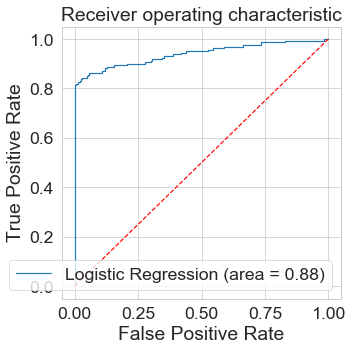

In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Logistic Regression with GridSearch

In [125]:
clf_logistic = LogisticRegression(solver='lbfgs')

In [126]:
clf_logistic.fit(X_train_smote, y_train_smote)

/Users/bhavikamehta/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [127]:
preds = clf_logistic.predict_proba(X_test)
preds_data = pd.DataFrame(preds[:,1], columns = ['prob_default'])
preds_data['loan_status'] = preds_data['prob_default'].apply(lambda x: 1 if x > 0.65 else 0)

In [128]:
#print(confusion_matrix(y_test, preds_data['loan_status']))
print(accuracy_score(y_test,preds_data['loan_status']))
print(classification_report(y_test, preds_data['loan_status']))

0.9996905023452076
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       0.79      0.76      0.77       160

    accuracy                           1.00    229404
   macro avg       0.89      0.88      0.89    229404
weighted avg       1.00      1.00      1.00    229404



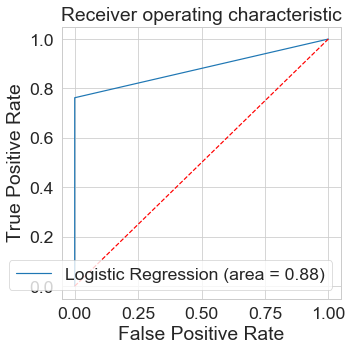

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, preds_data['loan_status'])
fpr, tpr, thresholds = roc_curve(y_test, preds_data['loan_status'])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[229244      0]
 [     0    160]]


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       1.00      1.00      1.00       160

    accuracy                           1.00    229404
   macro avg       1.00      1.00      1.00    229404
weighted avg       1.00      1.00      1.00    229404



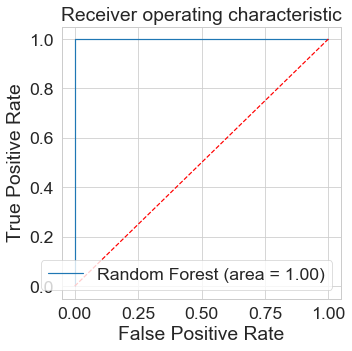

In [133]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# Naive Bayes

In [134]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train_smote, y_train_smote) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


In [135]:
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       1.00      1.00      1.00       160

    accuracy                           1.00    229404
   macro avg       1.00      1.00      1.00    229404
weighted avg       1.00      1.00      1.00    229404



# SVM with balancing

In [136]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_smote, y_train_smote)

SVC(kernel='linear')

In [137]:
y_pred = svclassifier.predict(X_test)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[229244      0]
 [     0    160]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       1.00      1.00      1.00       160

    accuracy                           1.00    229404
   macro avg       1.00      1.00      1.00    229404
weighted avg       1.00      1.00      1.00    229404



# kNN without Balancing

In [139]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [140]:
y_pred = classifier.predict(X_test)

In [141]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[229242      2]
 [    47    113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       0.98      0.71      0.82       160

    accuracy                           1.00    229404
   macro avg       0.99      0.85      0.91    229404
weighted avg       1.00      1.00      1.00    229404



# kNN with Balancing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_smote, y_train_smote)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))